In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
#import EventSync as ES
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
# import transfer_entropy as TE
plt.rcParams["figure.figsize"] = (20,5)
#https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3

In [2]:
lista = ["Atlanta-Sandy Springs-Alpharetta, GA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "Dallas-Fort Worth-Arlington, TX MSA",
    "Denver-Aurora-Lakewood, CO MSA",
    "Detroit_Dearborn, MI MSA",
    "Houston-The Woodlands-Sugar Land, TX MSA",
    "Los Angeles-Long Beach-Anaheim, CA MSA",
    "Miami-Fort Lauderdale-West Palm Beach, FL MSA",
    "Minneapolis-St. Paul-Bloomington, MN-WI MSA",
    "New York-Newark-Jersey City, NY-NJ-PA MSA",
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",
    "Phoenix-Mesa-Chandler, AZ MSA",
    "Riverside-San Bernardino-Ontario, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Tampa-St. Petersburg-Clearwater, FL MSA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"]

In [3]:
df = pd.read_csv("data/Floyd_period_Minutes_PBandNeg.csv")
df['date'] = pd.to_datetime(df['date'], format='-%y-%m%d',infer_datetime_format=True)
df = df.set_index('date')

In [4]:
after_bigger_before = []
city = []
minutes_interval = np.arange(30,12*60+30,30)
for l in lista:
    after_bigger_before_city = []
    for time_win in minutes_interval:
        PB_ts = df[["Police_brutality"]]
        neg_ts = df[[l]]
        time_indecies_PB = PB_ts[PB_ts["Police_brutality"]>0].index
        windows = []
        fake_windows = []
        for date in time_indecies_PB:
            hours_diff = datetime.timedelta(minutes = int(time_win))
            windows.append([date-hours_diff,date,date+hours_diff])
        before = []
        after = []
        for dates in windows:
            t_before = dates[0].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")
            t_now = dates[1].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")
            t_after= dates[2].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")
            before.append(np.mean(neg_ts[t_before:t_now][l].values))
            after.append(np.mean(neg_ts[t_now:t_after][l].values))
        after_bigger_before_city.append(wilcoxon(after,before,alternative = "greater")[1])        
    after_bigger_before.append(after_bigger_before_city)

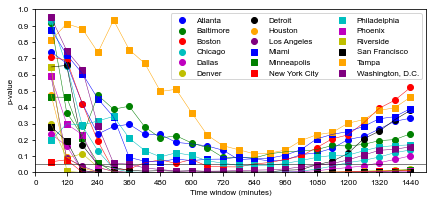

In [5]:
listaa = ["Atlanta",
    "Baltimore",
    "Boston",
    "Chicago",
    "Dallas",
    "Denver",
    "Detroit",
    "Houston",
    "Los Angeles",
    "Miami",
    "Minneapolis",
    "New York City",
    "Philadelphia",
    "Phoenix",
    "Riverside",
    "San Francisco",
    "Tampa",
    "Washington, D.C."]

colors = ["b", "g", "r", "c", "m", "y", "k", "orange", "purple","b", "g", "r", "c", "m", "y", "k", "orange","purple"]
markers = ["o","o","o","o","o","o","o","o","o","s","s","s","s","s","s","s","s","s"]
plt.rcParams.update({
  'font.size' : 8,
  "lines.linewidth": 0.5,
  "font.family":"arial",
})
fig, (ax1)  = plt.subplots(1, 1,
                                    sharey='row',figsize=(7, 3))
for i in range(len(lista)):
    ax1.scatter(minutes_interval,after_bigger_before[i], label = listaa[i],color = colors[i], marker = markers[i])
    ax1.plot(minutes_interval,after_bigger_before[i], color = colors[i])
ax1.axhline(0.05, color = "k")
ax1.set_xlabel("Time window (minutes)")
ax1.set_ylabel("p-value")
ax1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax1.set_ylim([0,1])
ax1.set_xticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
ax1.set_xticklabels([0,60*2,120*2,180*2,240*2,300*2,360*2,420*2,480*2,540*2,600*2,660*2,720*2]);
ax1.set_xlim([0,750])
plt.legend(ncol = 3, loc='upper right')
fig.savefig("plots/Floyd_Before_after_paired.png".format(l), dpi=150, bbox_inches="tight")

In [6]:
xaxis = []
yaxis = []
for j in range(len(minutes_interval)):
    counter = 0
    for i in range(len(listaa)):
        if after_bigger_before[i][j]<0.05: counter +=1;
    print(minutes_interval[j],counter)
    xaxis.append(minutes_interval[j])
    yaxis.append(counter)

30 0
60 1
90 6
120 9
150 12
180 12
210 12
240 12
270 12
300 12
330 13
360 13
390 14
420 13
450 13
480 12
510 12
540 12
570 10
600 9
630 9
660 8
690 8
720 8


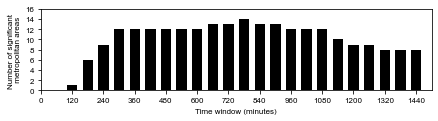

In [11]:
fig, (ax2)  = plt.subplots(1, 1, sharey='row',figsize=(7, 1.5))
ax2.bar(xaxis,yaxis,width =20, color = "k")
ax2.set_xticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
ax2.set_xticklabels([0,60*2,120*2,180*2,240*2,300*2,360*2,420*2,480*2,540*2,600*2,660*2,720*2]);
ax2.set_xlim([0,750])
ax2.set_yticks([0,2,4,6,8,10,12,14,16])
ax2.set_ylim([0,16])
ax2.set_xlabel("Time window (minutes)")
ax2.set_ylabel("Number of significant \n metropolitan areas")
fig.savefig("plots/NumbOfSig.png".format(l), dpi=150, bbox_inches="tight")